# Julia Academy

## Data Science Course

# 10. Neural Networks in Julia

**Huda Nassar**

**Source:** https://github.com/JuliaAcademy/DataScience/blob/main/10.%20Neural%20Nets.ipynb

We will look at how we can implement neural networks using the `Flux.jl` package in Julia, using the infamous MNIST dataset.

In [1]:
using Flux, Flux.Data.MNIST
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated
using Images
using Plots
using StatsBase: sample

Let's take a look at some of these images

In [27]:
mnist = MNIST.images();

,,,,,,,

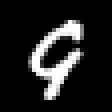
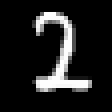
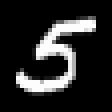
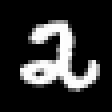
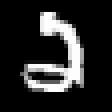
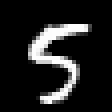
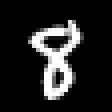
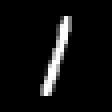

In [29]:
sample(mnist, 8, replace=false)

While each image is represented as an 2-dimensional array, the elements are a non-standard numeric type. We want to convert these images to a floating point array

In [30]:
typeof(mnist[1])

Array{Gray{Normed{UInt8,8}},2}

In [32]:
to_float32(X) = Float32.(X)
fpt_imgs = to_float32.(mnist)

60000-element Array{Array{Float32,2},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0

In [17]:
typeof(fpt_imgs[1])

Array{Float32,2}

Now we will create some more helpful functions

In [18]:
vectorize(x) = x[:]
vectorized_imgs = vectorize.(fpt_imgs);

Now let's create our dataset as a matrix

In [51]:
X = hcat(vectorized_imgs...)
size(X)

(784, 60000)

As a quick check, we can verify that this process has not lost any information:

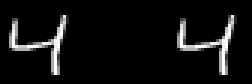

In [35]:
x_sample = X[:,3]
x_sample = reshape(x_sample, 28, 28)
colorview(Gray, hcat(x_sample, zeros(size(x_sample)), mnist[3]))

Now let's get the labels

In [36]:
labels = MNIST.labels()
labels[3]

4

One-hot encode the labels as an indicator vector where the correct label is.

In [37]:
Y = onehotbatch(labels, 0:9)  # in MNIST, 0 is the first digit, and 9 is the 10th digit

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  1  0  1     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  1  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  1  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  1  0  1  0  0  0  0  0  0  0

### Define the neural network

In [44]:
nnetwork = Chain(
    Dense(28^2, 32, relu),
    Dense(32, 10),
    softmax
)

Chain(Dense(784, 32, relu), Dense(32, 10), softmax)

As a check, how does this neural network transform its input? Why it takes a Julia array and outputs a Julia array (Julia all the way down)

In [46]:
nnetwork(vectorize(x_sample))  # remember we reshaped x_sample, so we vectorize again

10-element Array{Float32,1}:
 0.14534412
 0.09707237
 0.08854742
 0.10480764
 0.10673808
 0.07622286
 0.07558342
 0.10789169
 0.13588229
 0.0619101

### Define the loss function

In [49]:
 loss(x, y) = crossentropy(nnetwork(x), y)
 accuracy(x, y) = mean(argmax(nnetwork(x)) .== argmax(y));

Let's create an eval function callback to display during the loop

In [48]:
loss_callback = () -> @show(loss(X, Y));

To improve accuracy, we'll repeat the dataset so we have more samples to pass through the training loop

In [55]:
dataset = repeated((X,Y), 200);

Now let's define an optimizer. We'll use ADAM

In [56]:
opt = Flux.ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

We also need to get the trainable params

In [57]:
θ = Flux.params(nnetwork);

#### Now begin the training loop

In [59]:
Flux.train!(loss, θ, dataset, opt, cb=throttle(loss_callback, 10))

loss(X, Y) = 2.3087978f0
loss(X, Y) = 1.3257898f0
loss(X, Y) = 0.75609374f0
loss(X, Y) = 0.5688039f0
loss(X, Y) = 0.48491055f0
loss(X, Y) = 0.43222213f0
loss(X, Y) = 0.39523432f0
loss(X, Y) = 0.3674953f0
loss(X, Y) = 0.34715715f0
loss(X, Y) = 0.3303771f0
loss(X, Y) = 0.31512728f0
loss(X, Y) = 0.30376446f0
loss(X, Y) = 0.2920162f0
loss(X, Y) = 0.28224936f0


### Test set evaluation

Now that the network is trained, we can try it on the test data

In [60]:
test_images = MNIST.images(:test)
test_set = hcat(float.(reshape.(test_images, :))...);

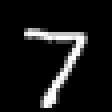

In [62]:
sample_test_img = test_set[:,1]
colorview(Gray, reshape(sample_test_img, 28, 28))

Now let's try the neural network on this sample

In [64]:
# test softmax distribution
sample_output = nnetwork(sample_test_img)

10-element Array{Float32,1}:
 0.0017408056
 3.1085149f-6
 0.0001689861
 0.0028648733
 2.3184602f-5
 0.00013410702
 6.2928257f-6
 0.99366546
 8.290674f-5
 0.0013103124

In [65]:
sample_pred_label = argmax(sample_output) - 1

7

Yay, it worked. Now let's try the image we tried earlier on the default initialized parameters

In [67]:
argmax( nnetwork(vectorize(x_sample)) ) - 1

4

Perfect

In [69]:
θ[1]

32×784 Array{Float32,2}:
 -0.0326841    0.0828       0.0759793    …   0.0293909   -0.0766047
  0.00162051  -0.0386024    0.0538956       -0.00874778  -0.0546198
 -0.00363952  -0.0823463    0.00859579      -0.0259495    0.0845862
  0.0791014    0.0395332   -0.0481769       -0.0637125   -0.0622999
  0.073427    -0.0341381    0.00868462       0.0405414    0.077878
  0.0161403   -0.021042    -0.00310758   …   0.044178     0.0529863
  0.0715785   -0.0376605   -0.0054879        0.0683997    0.0801135
 -0.00314577  -0.0263821   -0.0628713        0.00285861   0.00462587
  0.00467905  -0.0546417    0.0166793        0.0676102    0.0092139
  0.0206162   -0.0737192   -0.0324265       -0.063325     0.0775277
 -0.0134303   -0.076986    -0.0310222    …  -0.0232476   -0.0284026
  0.0350498    0.0763622   -0.0306058        0.0136959    0.0102355
 -0.0315415   -0.0235403    0.0471421        0.0678656    0.0564892
  ⋮                                      ⋱               
  0.0140613    0.00987587  -0.064